In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')

# Ames Housing Data

In [2]:
t = pd.read_csv('../datasets/house-prices-advanced-regression-techniques/train.csv')
t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Taking a peak at the data, we can see there is a combination of numerical and categorical features. Also, some features seem to be mostly NaNs. Let's split the data into numerical and categorical data in preperation for data cleaning that will come up.

In [17]:
# find the categorical features
# pick a threshold for what fraction is NaNs for the feature 
s = (t.dtypes == 'object')
object_cols = list(s[s].index)
size = len(t)
thresh = .2
colsToKeep = []

# iterate through the categorical features, calculate what fraction of the feature is Nans
# keep the column if it has fewer than 20 percent nans.
for c in object_cols:
    nnans = np.where(t[c].isnull())[0].size
    fracNans = nnans/size
    if fracNans < thresh:
        colsToKeep.append(c)

Grab the categorical features and prepare a simple imputer that will replace NaNs with whatever is most frequent

In [23]:
X_label = t.loc[:,colsToKeep]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_label_imputed = imputer.fit_transform(X_label)
X_label_imputed = pd.DataFrame(X_label_imputed, columns=colsToKeep)
X_label_imputed.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1335,735,1360,951,686,1392,1407,1340,1267,1198


Prepare a label encoder for the data. We will need this later for our machine learning algorithms

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in X_label_imputed.columns:
    X_label_imputed[col] = label_encoder.fit_transform(X_label_imputed[col])

Now we turn our attention to the numerical data. We will use a simple imputer here too to fill in any NaNs, but this time lets use the median value to fill in. 

In [30]:
X_num = t.select_dtypes(exclude=['object']).drop('SalePrice', axis=1)
numCols = X_num.columns
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_num_imputed = imputer.fit_transform(X_num)
X_num_imputed = pd.DataFrame(X_num_imputed, columns=numCols)
X_num_imputed.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


Merge the numerical imputed and categorical imputed data to make one big data boi

In [44]:
X = pd.concat([X_num_imputed, X_label_imputed], axis=1).drop('Id', axis=1)

In [31]:
y = t['SalePrice']

## Machine Learning

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [118]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num_imputed, y)

In [40]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [48]:
discrete_features = X.dtypes == int

In [49]:
mi_scores = make_mi_scores(X,y, discrete_features=discrete_features )

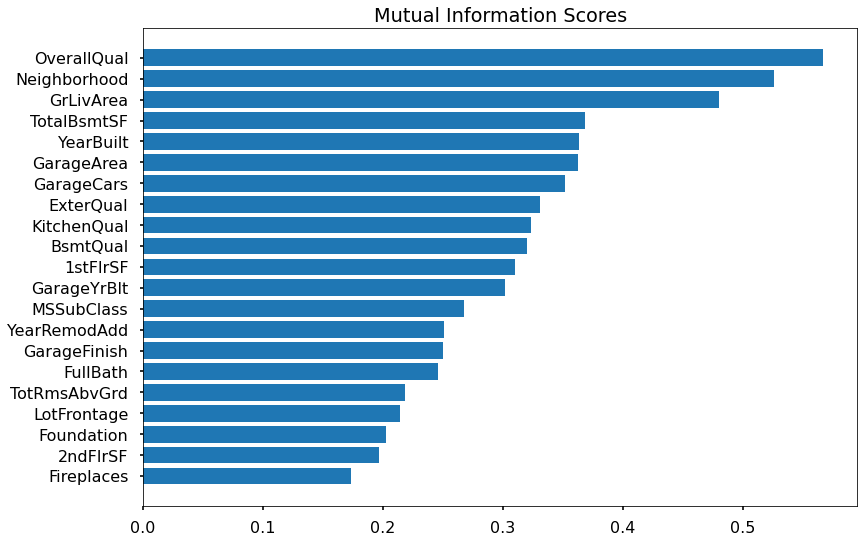

In [58]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure()
plot_mi_scores(mi_scores[:21])

Calculate the pearson correlation coefficent 

r = $\frac{\sum (x - \bar{x}) (y - \bar{y})}{\sum \sqrt{(x - \bar{x})^2(y- \bar{y})^2}}$

amoung all the numerical features. We will deal with the categorical data in a bit, this will help us examine which features correlate strongly with the target variable so we can select them

<AxesSubplot:>

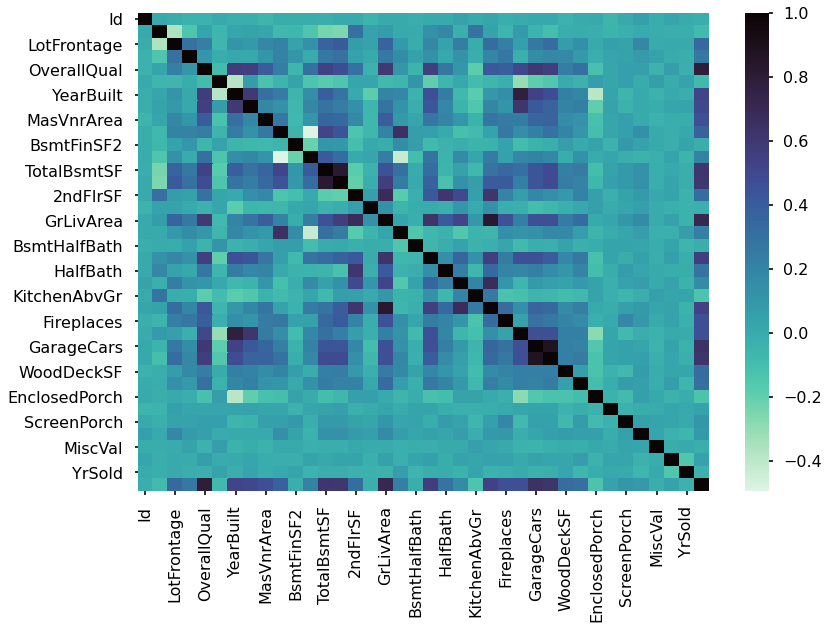

In [136]:
corr = pd.concat([X_num_imputed,y], axis=1).corr()
#f, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(corr, annot=False, cmap='mako_r')

In [60]:
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [130]:
# this is like doing a sort on the salePrice column
cols = corr.nlargest(21, 'SalePrice')['SalePrice'].index

In [131]:
cols[1:]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea'],
      dtype='object')

In [74]:
mi_scores[:20].index

Index(['OverallQual', 'Neighborhood', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt',
       'GarageArea', 'GarageCars', 'ExterQual', 'KitchenQual', 'BsmtQual',
       '1stFlrSF', 'GarageYrBlt', 'MSSubClass', 'YearRemodAdd', 'GarageFinish',
       'FullBath', 'TotRmsAbvGrd', 'LotFrontage', 'Foundation', '2ndFlrSF'],
      dtype='object')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfRS = GridSearchCV(
        RandomForestRegressor(),
        {"n_estimators":[500,1000,1500,2000],
        "max_depth":[1,2,3,4,5],
        },
        cv=3)

rfRS_result = rfRS.fit(X_train, y_train)
rfRS_best_params = rfRS_result.best_params_

In [122]:
best_rf = RandomForestRegressor(**rfRS_best_params)
best_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000)

In [124]:
ypred = best_rf.predict(X_test)
np.sqrt(np.square(y_test - ypred)).mean()

20361.637545358735

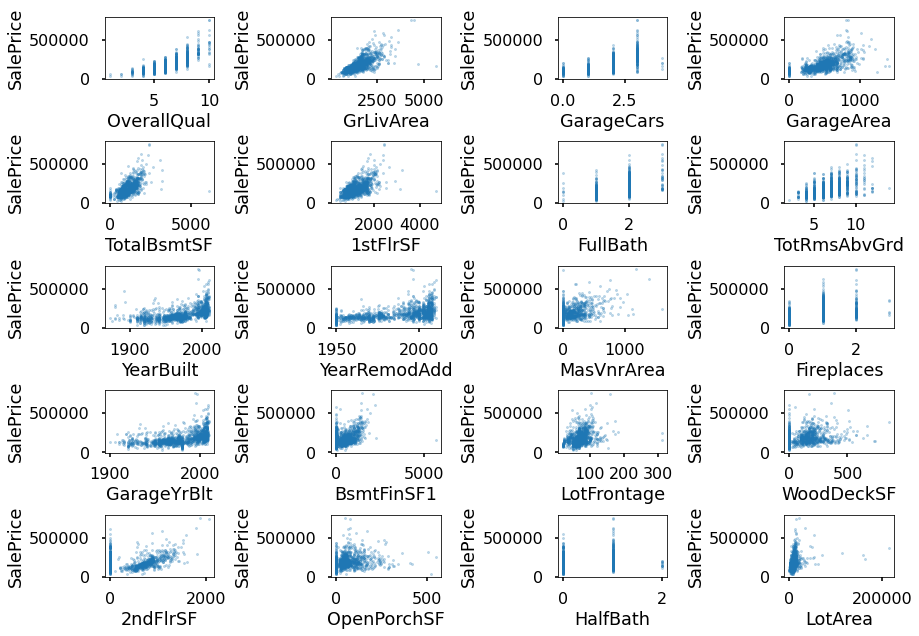

In [132]:
fig, ax = plt.subplots(ncols=4, nrows=5)

for i, a in zip(cols[1:],ax.flatten()):
    a.scatter(X[i], y,s=5, alpha=.3)
    a.set_xlabel(i)
    a.set_ylabel('SalePrice')
plt.tight_layout()

In [135]:
from sklearn.linear_model import LinearRegression
features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
lin_reg = LinearRegression().fit(X_train.loc[:,features], y_train)
ypred = reg.predict(X_test.loc[:,features])
np.sqrt(np.square(y_test - ypred)).mean()

24656.834298831134

In [161]:
lin_reg = LinearRegression().fit(X_train_num, y_train_num)
ypred = lin_reg.predict(X_test_num)
np.sqrt(np.square(y_test_num - ypred)).mean()

23030.71098230616

In [163]:
parameters = {'alpha':[.01,.1,1,2,3,4,5,6,7,8,9,10,20,50,70,100,200]}
#parameters = {'alpha':[.01,.1]}
reg = Ridge()
clf = GridSearchCV(reg, parameters)
res = clf.fit(X_train,y_train)
alpha_best = res.best_params_
ridge_reg = Ridge(**alpha_best).fit(X_train_num,y_train_num)
ypred = ridge_reg.predict(X_test_num)
np.sqrt(np.square(y_test_num - ypred)).mean()

22540.692590633847

In [164]:
parameters = {'alpha':[.001,.01,.1,1,2,3,4,5,6,7,8,9,10,20,50,70,100,200]}
#parameters = {'alpha':[.01,.1]}
reg = Lasso()
clf = GridSearchCV(reg, parameters)
res = clf.fit(X_train_num,y_train_num)
alpha_best = res.best_params_
lasso_reg = Lasso(**alpha_best).fit(X_train_num,y_train_num)
ypred = lasso_reg.predict(X_test_num)
np.sqrt(np.square(y_test_num - ypred)).mean()

23030.708488933957

In [155]:
from sklearn.neighbors import KNeighborsRegressor

In [167]:
parameters = {"n_neighbors":[5,6,7,8,9,10,15,20]}
reg = KNeighborsRegressor()
clf = GridSearchCV(reg, parameters)
res = clf.fit(X_train_num, y_train_num)
knn = KNeighborsRegressor(**res.best_params_).fit(X_train_num, y_train_num)

In [168]:
meta_X=[]
for algo in [lin_reg, ridge_reg, lasso_reg, knn]:
    yhat = algo.predict(X_test_num)
    yhat = yhat.reshape(len(yhat), 1)
    # store prediction
    meta_X.append(yhat)

In [170]:
meta_X = np.hstack(meta_X)

In [172]:
meta_X.shape

(365, 4)

In [176]:
y_test_num.shape

(365,)

In [177]:
rf = RandomForestRegressor(n_estimators=1500, max_depth=5)
rf.fit(meta_X, y_test_num)

RandomForestRegressor(max_depth=5, n_estimators=1500)

In [178]:
X.shape

(1460, 74)